In [1]:
import numpy as np 
import pandas as pd 
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, GlobalAveragePooling2D, Dropout, Flatten
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
train_ds="/kaggle/input/100-bird-species/train"
test_ds="/kaggle/input/100-bird-species/test"
validation_ds="/kaggle/input/100-bird-species/valid"

# Data preprocessing
****

In [3]:
os.listdir('/kaggle/input/100-bird-species/train')

['DALMATIAN PELICAN',
 'BLACK BREASTED PUFFBIRD',
 'WATTLED CURASSOW',
 'AMERICAN WIGEON',
 'CARMINE BEE-EATER',
 'GAMBELS QUAIL',
 'UMBRELLA BIRD',
 'AMERICAN KESTREL',
 'AMERICAN GOLDFINCH',
 'BLUE GROSBEAK',
 'PALM NUT VULTURE',
 'DUSKY LORY',
 'AUCKLAND SHAQ',
 'BLACK THROATED WARBLER',
 'YELLOW CACIQUE',
 'STRIPPED SWALLOW',
 'VERMILION FLYCATHER',
 'CAPE MAY WARBLER',
 'RED TAILED HAWK',
 'GURNEYS PITTA',
 'INDIAN ROLLER',
 'SNOW GOOSE',
 'GREEN WINGED DOVE',
 'AZURE TANAGER',
 'GREEN MAGPIE',
 'BANDED BROADBILL',
 'AFRICAN PYGMY GOOSE',
 'INDIGO FLYCATCHER',
 'GREY PLOVER',
 'TOUCHAN',
 'HYACINTH MACAW',
 'HARLEQUIN DUCK',
 'ABYSSINIAN GROUND HORNBILL',
 'CALIFORNIA QUAIL',
 'BALD IBIS',
 'WOOD THRUSH',
 'RUBY THROATED HUMMINGBIRD',
 'INDIGO BUNTING',
 'ALBERTS TOWHEE',
 'SORA',
 'HOODED MERGANSER',
 'ROSEATE SPOONBILL',
 'CAPE ROCK THRUSH',
 'BLUE COAU',
 'CALIFORNIA CONDOR',
 'BORNEAN PHEASANT',
 'BARN SWALLOW',
 'TAIWAN MAGPIE',
 'SPLENDID WREN',
 'RED BILLED TROPICBIRD',
 'B

In [4]:
batch_size=32
img_size=224

In [5]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                             zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2
                             )

val_datagen = ImageDataGenerator(rescale=1/255.)

test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_ds,  
                                                target_size=(img_size, img_size), 
                                                batch_size=batch_size,
                                                shuffle=True,
                                                class_mode='categorical')  

validation_generator = val_datagen.flow_from_directory(validation_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

test_generator = test_datagen.flow_from_directory(test_ds,
                                                    target_size=(img_size, img_size),
                                                    batch_size=batch_size,
                                                    shuffle=False,
                                                    class_mode='categorical')

Found 84635 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.
Found 2625 images belonging to 525 classes.


In [6]:
train_generator[0][0].shape

(32, 224, 224, 3)

In [7]:
img= train_generator[0]
print(img)

(array([[[[0.7607844 , 0.7843138 , 0.8470589 ],
         [0.7607844 , 0.7843138 , 0.8470589 ],
         [0.7607844 , 0.7843138 , 0.8470589 ],
         ...,
         [0.7176471 , 0.7411765 , 0.7960785 ],
         [0.7176471 , 0.7411765 , 0.7960785 ],
         [0.7176471 , 0.7411765 , 0.7960785 ]],

        [[0.7607844 , 0.7843138 , 0.8470589 ],
         [0.7607844 , 0.7843138 , 0.8470589 ],
         [0.7607844 , 0.7843138 , 0.8470589 ],
         ...,
         [0.7176471 , 0.7411765 , 0.7960785 ],
         [0.7176471 , 0.7411765 , 0.7960785 ],
         [0.7176471 , 0.7411765 , 0.7960785 ]],

        [[0.7607844 , 0.7843138 , 0.8470589 ],
         [0.7607844 , 0.7843138 , 0.8470589 ],
         [0.7607844 , 0.7843138 , 0.8470589 ],
         ...,
         [0.7176471 , 0.7411765 , 0.7960785 ],
         [0.7176471 , 0.7411765 , 0.7960785 ],
         [0.7176471 , 0.7411765 , 0.7960785 ]],

        ...,

        [[0.3537651 , 0.32315245, 0.30910814],
         [0.3631896 , 0.33571842, 0.31224963

In [8]:
type(train_generator)

keras.preprocessing.image.DirectoryIterator

In [9]:
img = train_generator[0]
print(img[0].shape) # shape of the input batch
print(img[1].shape) # shape of the target labels

(32, 224, 224, 3)
(32, 525)


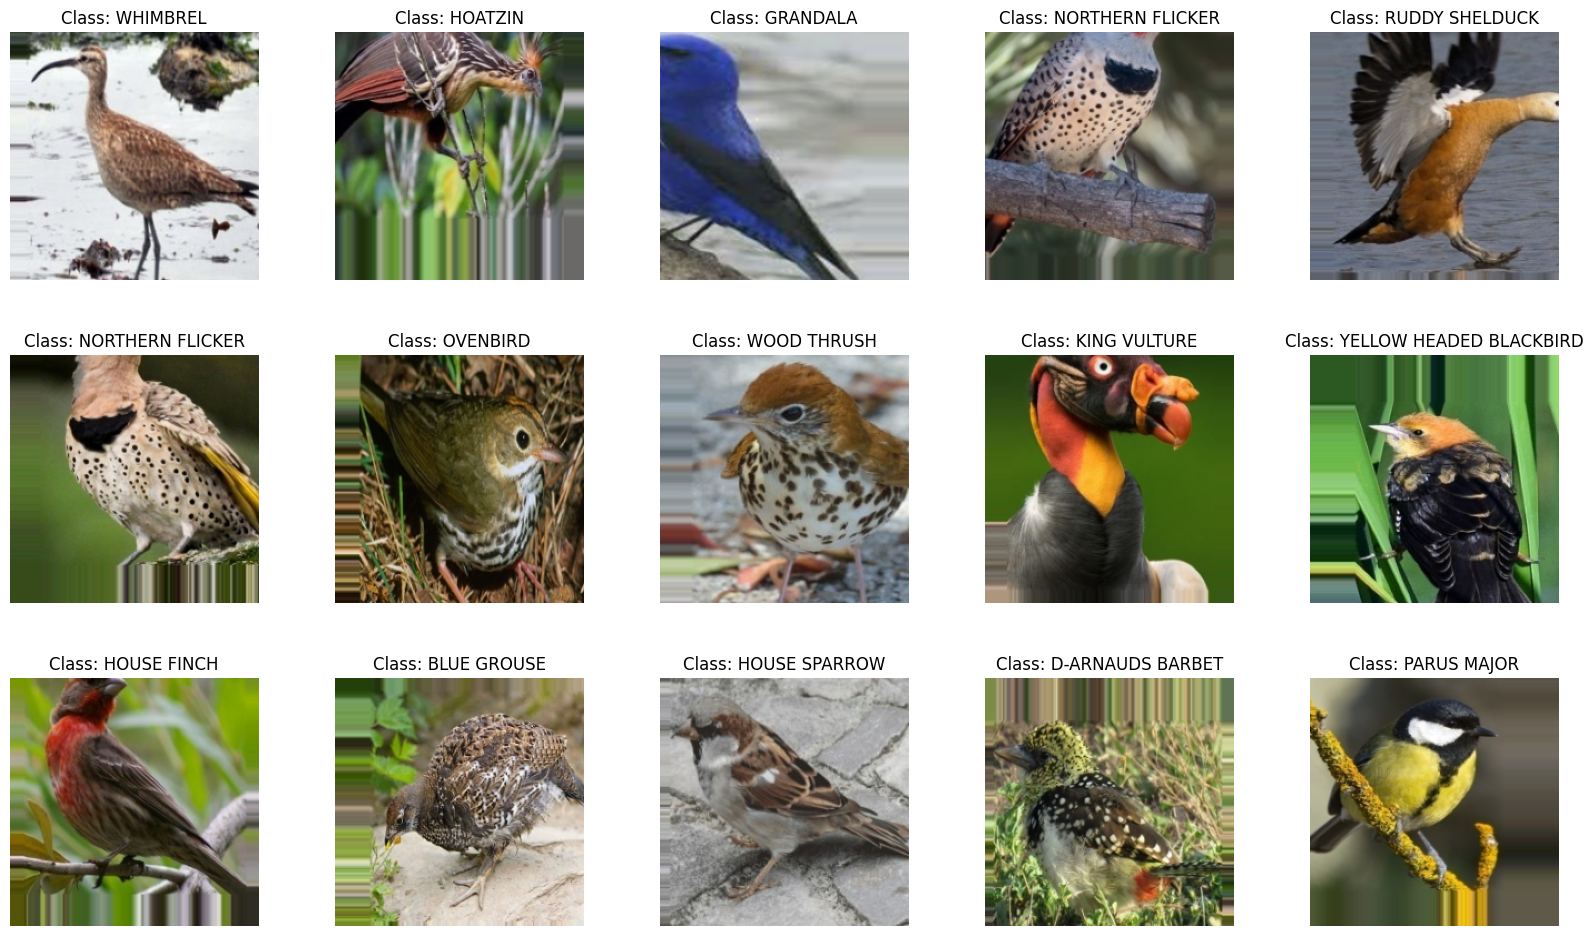

In [10]:
labels = [k for k in train_generator.class_indices]
sample_generate = train_generator.__next__()

images = sample_generate[0]
titles = sample_generate[1]
plt.figure(figsize = (20 , 20))

for i in range(15):
    plt.subplot(5 , 5, i+1)
    plt.subplots_adjust(hspace = 0.3 , wspace = 0.3)
    plt.imshow(images[i])
    plt.title(f'Class: {labels[np.argmax(titles[i],axis=0)]}')
    plt.axis("off")

In [11]:
print(len(train_generator))
print(len(test_ds))
print(len(validation_ds))

2645
35
36


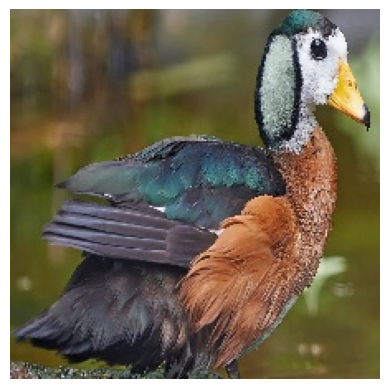

In [12]:
import matplotlib.pyplot as plt
from skimage import io

# Load image
img_url = "/kaggle/input/100-bird-species/train/AFRICAN PYGMY GOOSE/005.jpg"
img = io.imread(img_url)

# Display image
plt.imshow(img)
plt.axis('off')
plt.show()

In [13]:
from keras.layers import MaxPool2D

In [14]:
import numpy as np
from keras.layers import Dense,Flatten,Conv2D,Activation,Dropout

from keras import backend as K

import keras

from keras.models import Sequential, Model

from keras.models import load_model

from keras.optimizers import SGD

from keras.callbacks import EarlyStopping,ModelCheckpoint

from keras.layers import MaxPool2D

# Build MobileNet Model

17225924/17225924 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128    

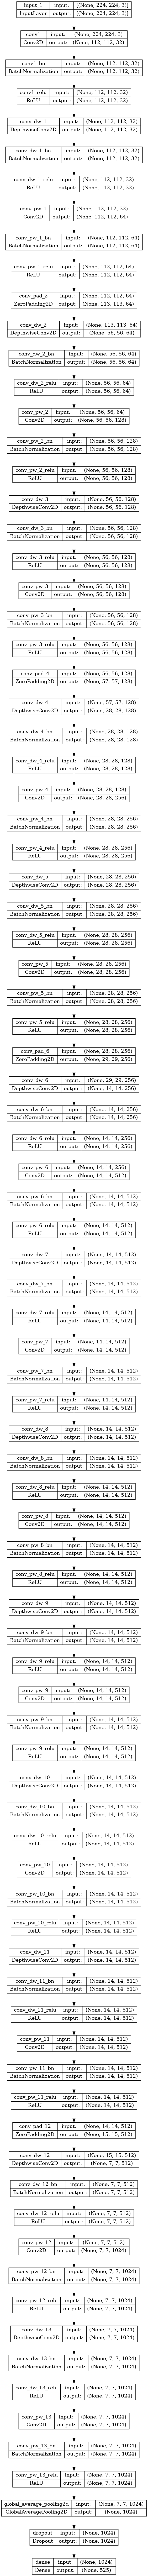

In [15]:
from keras.models import Model
from keras.layers import Input, Conv2D, GlobalAveragePooling2D, Dropout
from keras.layers import Activation, BatchNormalization
from keras.utils import plot_model
from keras.applications.mobilenet import MobileNet
def mobilenet(input_shape):
    input_tensor = Input(shape=input_shape)
    base_model = MobileNet(include_top=False, input_tensor=input_tensor)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(525, activation='softmax')(x)

    model = Model(inputs=input_tensor, outputs=x)

    return model


input_shape = (224, 224, 3)
num_classes =525

model = mobilenet(input_shape)
model.summary()
plot_model(model, to_file='mobilenet.png', show_shapes=True)

In [16]:
model = mobilenet((224, 224, 3))

#   Model summary

In [17]:
# Print the model summary

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                    

In [18]:
import keras
from keras.models import Sequential
from keras.layers import Dense

In [19]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [20]:
history =model.fit(train_generator, validation_data=test_generator, epochs=15)

Epoch 1/15
2645/2645 [==============================] - 1861s 698ms/step - loss: 6.4298 - accuracy: 0.0111 - val_loss: 5.1901 - val_accuracy: 0.1383
Epoch 2/15
2645/2645 [==============================] - 1230s 465ms/step - loss: 5.1678 - accuracy: 0.0812 - val_loss: 3.7147 - val_accuracy: 0.4278
Epoch 3/15
2645/2645 [==============================] - 1225s 463ms/step - loss: 4.0991 - accuracy: 0.2071 - val_loss: 2.5682 - val_accuracy: 0.6229
Epoch 4/15
2645/2645 [==============================] - 1217s 460ms/step - loss: 3.3001 - accuracy: 0.3315 - val_loss: 1.8581 - val_accuracy: 0.7333
Epoch 5/15
2645/2645 [==============================] - 1226s 464ms/step - loss: 2.7175 - accuracy: 0.4340 - val_loss: 1.3609 - val_accuracy: 0.8046
Epoch 6/15
2645/2645 [==============================] - 1204s 455ms/step - loss: 2.2735 - accuracy: 0.5185 - val_loss: 1.0382 - val_accuracy: 0.8488
Epoch 7/15
2645/2645 [==============================] - 1224s 463ms/step - loss: 1.9457 - accuracy: 0.5835

In [31]:
n_categories = len(os.listdir('/kaggle/input/100-bird-species/valid'))# number of categories print(n_categories)

In [32]:
n_categories

525

In [33]:
results =pd.DataFrame(history.history)
results.head()

,loss,accuracy,val_loss,val_accuracy
0,6.429829,0.011095,5.190144,0.138286
1,5.167805,0.081160,3.714650,0.427810
2,4.099139,0.207137,2.568163,0.622857
3,3.300081,0.331494,1.858129,0.733333
4,2.717491,0.434028,1.360948,0.804571


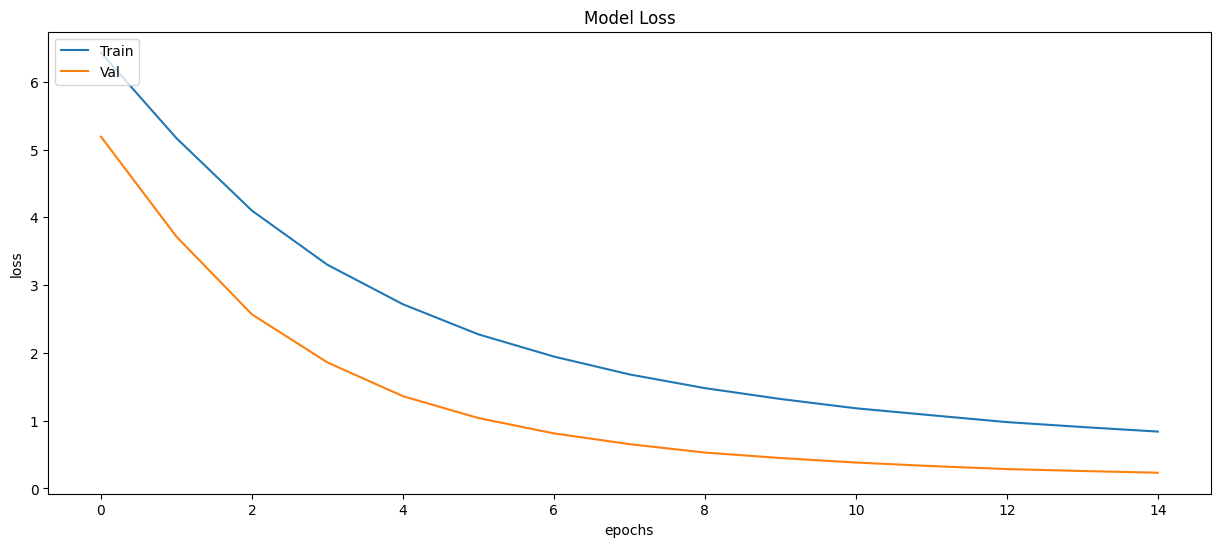

In [34]:
plt.figure(figsize=(15,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['Train','Val'], loc= 'upper left')
plt.show()

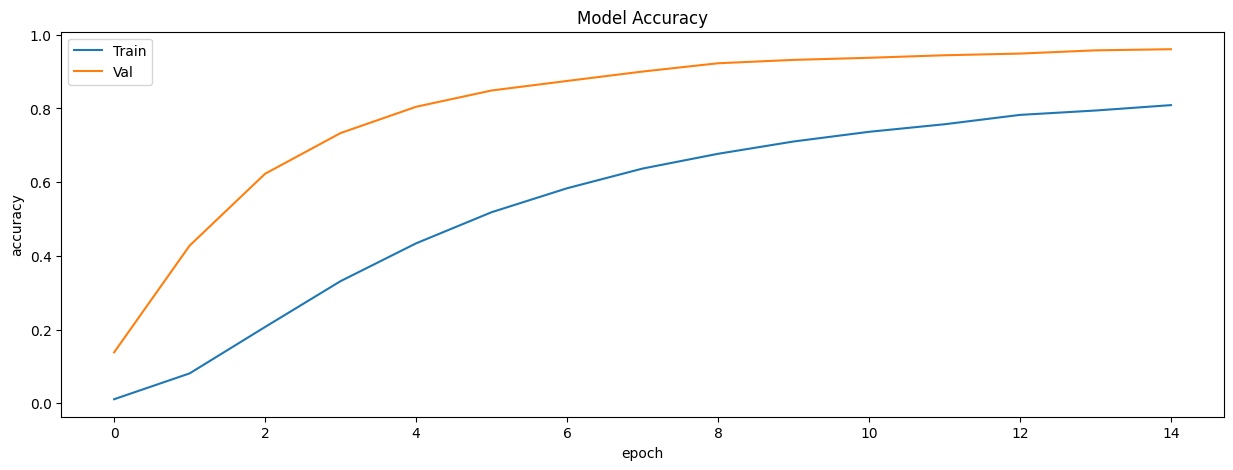

In [35]:
plt.figure(figsize=(15,5))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [36]:
y_test_1 = test_generator.classes
y_pred_1 =model.predict(test_generator)
y_pred_1 = np.argmax(y_pred_1,axis=1)

83/83 [==============================] - 11s 132ms/step


In [37]:
results =model.evaluate(test_generator)

83/83 [==============================] - 8s 90ms/step - loss: 0.2314 - accuracy: 0.9608


In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test_1, y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      0.60      0.75         5
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         5
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         5
           7       1.00      0.80      0.89         5
           8       1.00      1.00      1.00         5
           9       0.80      0.80      0.80         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         5
          12       1.00      1.00      1.00         5
          13       1.00      0.60      0.75         5
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         5
          16       1.00      1.00      1.00         5
          17       1.00    

1/1 [==============================] - 0s 27ms/step


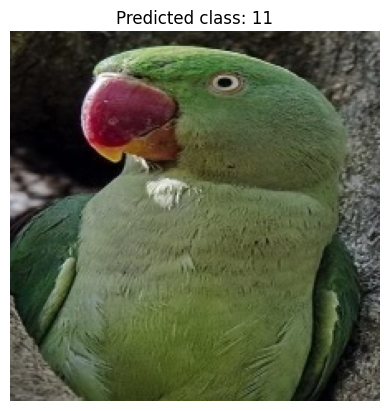

In [39]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

image_directory = '/kaggle/input/100-bird-species/valid/ALEXANDRINE PARAKEET'
img_size = 224

images = [] 
for filename in os.listdir(image_directory):
    path = os.path.join(image_directory, filename)
    img = Image.open(path)
    img = img.resize((img_size, img_size))
    images.append(img)

images = np.array([np.array(img) for img in images])
images = images / 255.0

predictions = model.predict(images)

# Select image to display
img_index = 0

# Get predicted class label
class_label = np.argmax(predictions[img_index])

# Display image and predicted class label
plt.imshow(images[img_index])
plt.axis('off')
plt.title('Predicted class: ' + str(class_label))
plt.show()

In [41]:
for i in range(len(images)):
    predicted_class = np.argmax(predictions[i])
    class_probability = predictions[i, predicted_class]
    print(f'Predicted class for {i+1}.jpg : {labels[predicted_class]}')
    print('Class probability:', class_probability)

Predicted class for 1.jpg : ALEXANDRINE PARAKEET
Class probability: 0.97855264
Predicted class for 2.jpg : ALEXANDRINE PARAKEET
Class probability: 0.99903166
Predicted class for 3.jpg : ALEXANDRINE PARAKEET
Class probability: 0.93747157
Predicted class for 4.jpg : ALEXANDRINE PARAKEET
Class probability: 0.9979976
Predicted class for 5.jpg : ALEXANDRINE PARAKEET
Class probability: 0.9972958


Thank You !